In this notebook are described the steps to analyse data in the <strong>An Eye on Semantics</strong> paper.

Let's start by importing the packages we will need.

In [1]:
library(readxl)
library(lme4)
library(lmerTest)
library(languageR)
library(lattice)
library(BayesFactor)
library(ggeffects)
library(ggplot2)
library(performance)

Warning message:
"package 'readxl' was built under R version 3.6.3"Warning message:
"package 'lme4' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'lmerTest' was built under R version 3.6.3"
Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

Warning message:
"package 'languageR' was built under R version 3.6.3"Warning message:
"package 'BayesFactor' was built under R version 3.6.3"Loading required package: coda
Warning message:
"package 'coda' was built under R version 3.6.3"************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************
Warning message:
"package 'ggeffects' was built under R version 3.6.2"Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'performance' was built unde

In [2]:
R.version

               _                           
platform       x86_64-w64-mingw32          
arch           x86_64                      
os             mingw32                     
system         x86_64, mingw32             
status                                     
major          3                           
minor          6.1                         
year           2019                        
month          07                          
day            05                          
svn rev        76782                       
language       R                           
version.string R version 3.6.1 (2019-07-05)
nickname       Action of the Toes          

In [3]:
citation('sjPlot')


Lüdecke D (2021). _sjPlot: Data Visualization for Statistics in Social
Science_. R package version 2.8.10, <URL:
https://CRAN.R-project.org/package=sjPlot>.

A BibTeX entry for LaTeX users is

  @Manual{,
    title = {sjPlot: Data Visualization for Statistics in Social Science},
    author = {Daniel Lüdecke},
    year = {2021},
    note = {R package version 2.8.10},
    url = {https://CRAN.R-project.org/package=sjPlot},
  }


# First Fixation Duration

Import the dataset

In [4]:
FFD2 <- read.csv('C:/Users/fm02/OwnCloud/EOS_EyeTrackingDataCollection/Data_Results/data_forR/norm_ffd_41.csv')

Consider only values greater than 0, in the preprocessing step we already selected only fixations 80-600ms long.

In [5]:
FFD2 <- FFD2[FFD2$ms != 0, ]

In [6]:
colnames(FFD2)

[1] "ms"                    "trialnr"               "time_before_ff"       
 [4] "regressed"             "n_tot_fix"             "n_prior_fix"          
 [7] "Word"                  "ID"                    "ConcM"                
[10] "LEN"                   "UN2_F"                 "UN3_F"                
[13] "Orth"                  "OLD20"                 "FreqCount"            
[16] "LogFreqZipf"           "V_MeanSum"             "A_MeanSum"            
[19] "mink3_SM"              "BLP_rt"                "BLP_accuracy"         
[22] "similarity"            "Position"              "PRECEDING_Frequency"  
[25] "PRECEDING_LogFreqZipf" "LENprec"               "Predictability"       
[28] "cloze"                 "plausibility"          "Sim"                  
[31] "Subject"               "Gender"                "Age"

Check which factors affect fixation durations, among those that are already established in the literature (excluding effects of interest).


In [7]:
trialsFFD2 = lmer(ms ~ trialnr + (1|ID) + (1|Subject), data = FFD2)
summary(trialsFFD2)
# trial order does not influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ trialnr + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123159.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7101 -0.6535 -0.1552  0.4681  5.5307 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  191.9   13.85   
 Subject  (Intercept)  589.7   24.28   
 Residual             4232.0   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.198e+02  4.100e+00 4.791e+01  53.623   <2e-16 ***
trialnr     4.262e-03  5.446e-03 1.079e+04   0.783    0.434    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
        (Intr)
trialnr -0.264

In [8]:
freqFFD2 = lmer(ms ~ LogFreqZipf + (1|ID) + (1|Subject), data = FFD2)
summary(freqFFD2)
# Zipf does influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123138.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6646 -0.6547 -0.1581  0.4670  5.4828 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  183.5   13.55   
 Subject  (Intercept)  589.9   24.29   
 Residual             4231.6   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6507     3.9523  41.3582  55.828  < 2e-16 ***
LogFreqZipf  -3.1182     0.9196 392.2594  -3.391 0.000768 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
LogFreqZipf 0.003 

In [9]:
LENFFD2 = lmer(ms ~ LEN + (1|ID) + (1|Subject), data = FFD2)
summary(LENFFD2)
# length does not influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LEN + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123148.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6963 -0.6528 -0.1549  0.4677  5.5385 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  191.9   13.85   
 Subject  (Intercept)  589.6   24.28   
 Residual             4231.8   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6371     3.9544  41.4754  55.795   <2e-16 ***
LEN           0.9759     0.9404 406.9997   1.038      0.3    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
    (Intr)
LEN -0.010

In [10]:
precFFD2 = lmer(ms ~ PRECEDING_LogFreqZipf + (1|ID) + (1|Subject), data = FFD2)
summary(precFFD2)
# Zipf of the preceding word does influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ PRECEDING_LogFreqZipf + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123143.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6810 -0.6548 -0.1528  0.4681  5.5097 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  187.6   13.70   
 Subject  (Intercept)  590.0   24.29   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6791     3.9540  41.4077  55.811   <2e-16 ***
PRECEDING_LogFreqZipf  -2.3384     0.9288 398.3154  -2.518   0.0122 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
PRECEDING_L 0.000 

In [11]:
posFFD2 = lmer(ms ~  Position + (1|ID) + (1|Subject), data = FFD2)
summary(posFFD2)
# position in the sentece does influence FFD

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ Position + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123144.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7246 -0.6551 -0.1553  0.4659  5.5544 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  188.1   13.71   
 Subject  (Intercept)  589.7   24.28   
 Residual             4231.8   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept) 220.6930     3.9531  41.4168  55.827   <2e-16 ***
Position      2.2157     0.9326 402.9945   2.376    0.018 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr)
Position 0.001 

In [12]:
tbFFD2 = lmer(ms ~  time_before_ff + (1|ID) + (1|Subject), data = FFD2)
summary(tbFFD2)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ time_before_ff + (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123147.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6938 -0.6544 -0.1564  0.4654  5.5219 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  187.6   13.70   
 Subject  (Intercept)  589.8   24.29   
 Residual             4232.9   65.06   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)     220.6859     3.9535   41.4120  55.821   <2e-16 ***
time_before_ff    1.2105     0.6706 8804.2172   1.805   0.0711 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
            (Intr)
time_bfr_ff 0.001 

This is our <strong> basic model </strong> which will be used for model comparison, in order to check the influence of our predictors of interest <strong> concreteness </strong> and <strong> predictability </strong>

In [13]:
lmeBasic = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1|ID) + (1|Subject), data = FFD2)
summary(lmeBasic)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + (1 | ID) +  
    (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123123.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6734 -0.6545 -0.1567  0.4712  5.4921 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  175.3   13.24   
 Subject  (Intercept)  589.8   24.29   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6675     3.9495  41.2505  55.872  < 2e-16 ***
LogFreqZipf            -2.9641     0.9109 389.9325  -3.254  0.00124 ** 
PRECEDING_LogFreqZipf  -2.1980     0.9152 396.6044  -2.402  0.01678 *  
Position                2.3147     0.9158 401.8951   2.528  0.01187 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0

Let's test predictability influence.

In [14]:
lmeOnlySemSim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position +  Sim +
                       (1|ID) + (1|Subject), data = FFD2)
anova(lmeBasic, lmeOnlySemSim)


refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,123147.1,123198.3,-61566.57,123133.1,NA,NA,NA
lmeOnlySemSim,8,123107.8,123166.2,-61545.89,123091.8,41.35329,1,1.270576e-10


Predictability has a significant influence on FFD.

Now we test whether concreteness influence FFD. 

In [15]:
onlyConc = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + ConcM + (1|ID) + (1|Subject), data = FFD2)
anova(lmeBasic, onlyConc)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
lmeBasic,7,123147.1,123198.3,-61566.57,123133.1,NA,NA,NA
onlyConc,8,123138.9,123197.3,-61561.44,123122.9,10.26058,1,0.001359027


Concreteness has a significant influence on FFD.

Let's now check the joint influence of concreteness and predictability and test whether their effect is additive or interactive.

In [16]:
interaction_Conc.SemSim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim*ConcM + (1|ID) + (1|Subject), data = FFD2)
additive_Conc.SemSim = lmer(ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM + (1|ID) + (1|Subject), data = FFD2)

In [17]:
summary(additive_Conc.SemSim, corr=F)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim + ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123074

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7211 -0.6523 -0.1532  0.4674  5.4547 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  140.0   11.83   
 Subject  (Intercept)  588.8   24.27   
 Residual             4231.8   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6139     3.9350  40.7916  56.064  < 2e-16 ***
LogFreqZipf            -1.8559     0.8758 385.8517  -2.119   0.0347 *  
PRECEDING_LogFreqZipf  -2.1898     0.8701 393.2857  -2.517   0.0122 *  
Position                2.1452     0.8662 399.9178   2.477   0.0137 *  
Sim                    -5.4925     0.8940 399.

In [18]:
summary(interaction_Conc.SemSim, corr=F) 

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: ms ~ LogFreqZipf + PRECEDING_LogFreqZipf + Position + Sim * ConcM +  
    (1 | ID) + (1 | Subject)
   Data: FFD2

REML criterion at convergence: 123072.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.7199 -0.6525 -0.1518  0.4675  5.4544 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  140.7   11.86   
 Subject  (Intercept)  588.9   24.27   
 Residual             4231.7   65.05   
Number of obs: 10966, groups:  ID, 400; Subject, 40

Fixed effects:
                      Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)           220.6810     3.9382  40.9156  56.036  < 2e-16 ***
LogFreqZipf            -1.8787     0.8782 385.2791  -2.139   0.0330 *  
PRECEDING_LogFreqZipf  -2.1323     0.8801 393.3182  -2.423   0.0159 *  
Position                2.0990     0.8731 399.3809   2.404   0.0167 *  
Sim                    -5.4243     0.9073 39

In [19]:
anova(interaction_Conc.SemSim,additive_Conc.SemSim)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
additive_Conc.SemSim,9,123104.4,123170.1,-61543.19,123086.4,NA,NA,NA
interaction_Conc.SemSim,10,123106.2,123179.2,-61543.08,123086.2,0.2094683,1,0.6471845


We don't have evidence in suppoty of an interactive influence of predictability and concreteness on FFD.
Let's visualize the confidence intervals of the estimates.

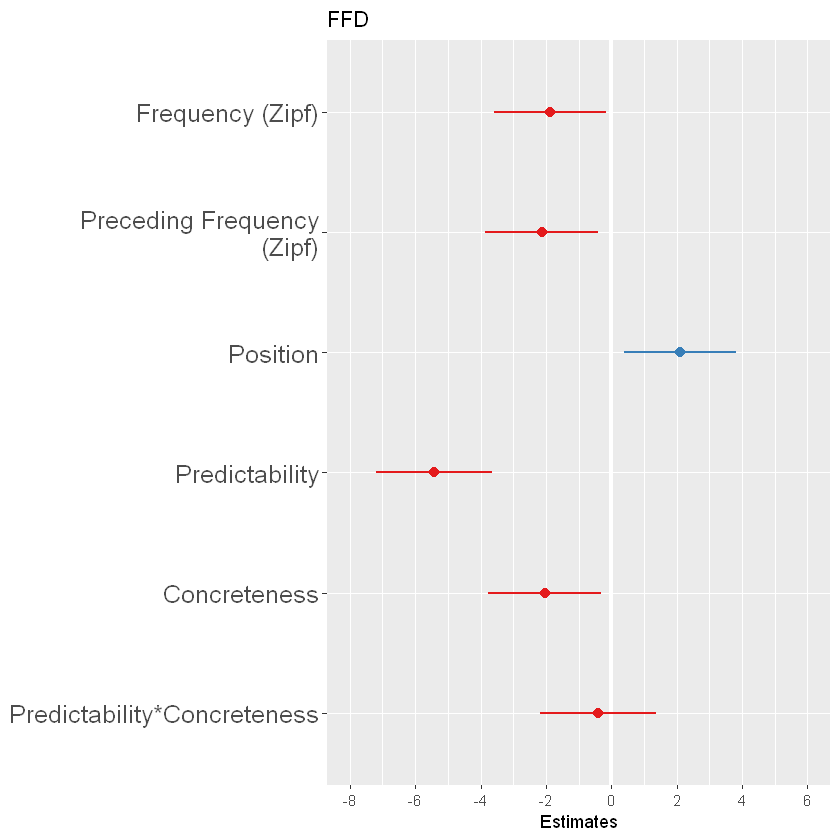

In [20]:
p <- sjPlot::plot_model(interaction_Conc.SemSim, , title = "FFD",
                       axis.labels = c("Predictability*Concreteness",
                                       "Concreteness",
                                       "Predictability",
                                       "Position",
                                       "Preceding Frequency (Zipf)",
                                       "Frequency (Zipf)",
                                       "Intercept"))
p + sjPlot::font_size(labels.y = 15)

In [94]:
# options(repr.plot.width  = 6,
#         repr.plot.height = 6)

In order to better characterise the relationship between predictability and concreteness, and to compare it with the established additive influence of predictability and frequency, let's plot the predicted values for the response.

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


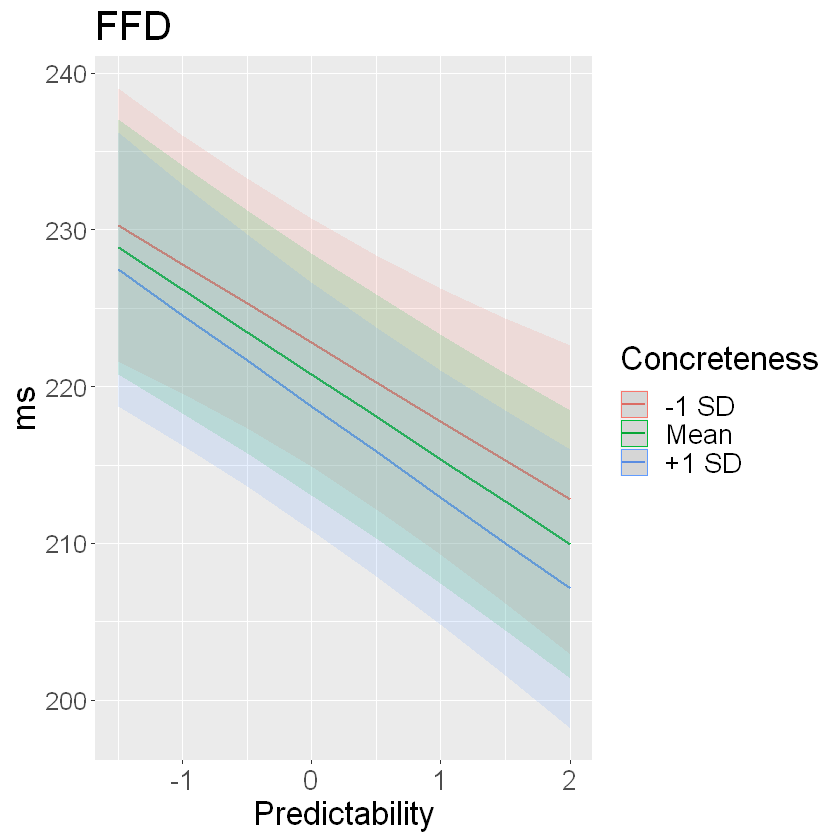

In [25]:
# plot both concreteness and Sim

dfConcSim <- ggeffect(interaction_Conc.SemSim, terms = c("Sim", "ConcM"));
p <- plot(dfConcSim) +
  labs(x="Predictability", colour="Concreteness", title = "FFD") +
  scale_color_discrete(labels = c("-1 SD", "Mean", "+1 SD"));
p + sjPlot::font_size(labels.y = 15) + theme(text=element_text(size=20));



Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


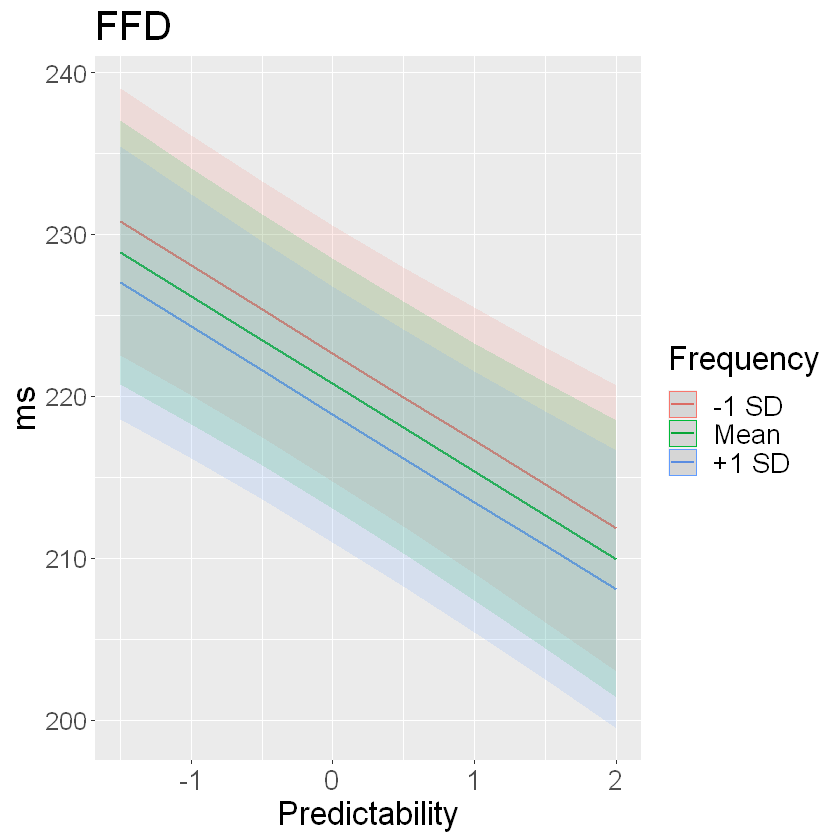

In [26]:
dfConcSim <- ggeffect(interaction_Conc.SemSim, terms = c("Sim", "LogFreqZipf"));
p <- plot(dfConcSim) +
  labs(x="Predictability", colour="Frequency", title = "FFD") +
  scale_color_discrete(labels = c("-1 SD", "Mean", "+1 SD"));
p + sjPlot::font_size(labels.y = 15) + theme(text=element_text(size=20));
